In [89]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import nltk
import matplotlib.pyplot as plt

In [47]:
dataset=pd.read_csv('bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [48]:
output_label={
    'tech':1,
    'business':2,
    'sport':3,
    'politics':4,
    'entertainment':5
}
dataset['category']=dataset['category'].map(output_label)

In [49]:
print(len(dataset))

2225


/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


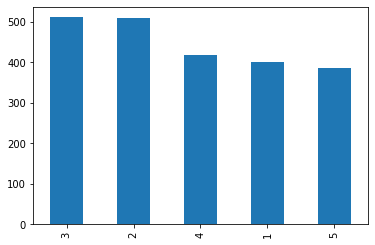

In [50]:
dataset['category'].value_counts().plot('bar')

In [51]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [52]:
sentences=[]
labels=[]
for i in dataset['text']:
    sentences.append(i)
for i in dataset['category']:
    labels.append(i)    

In [58]:
training_portion=0.8
vocab_size=1000
embedding_dim=16
oov_token='<OOV>'
max_length=120
trunc_type='post'
padding_type='post'

In [61]:
training_size=int(len(sentences)*training_portion)
train_sentences=sentences[:training_size]
train_labels=labels[:training_size]
validation_sentences=sentences[training_size:]
validation_labels=labels[training_size:]
print(len(train_sentences),len(train_labels))
print(len(validation_sentences),len(validation_labels))

1780 1780
445 445


In [62]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(train_sentences)
print(np.asarray(train_sequences).shape)
train_padded=pad_sequences(train_sequences,padding=padding_type,maxlen=max_length)
print(train_padded.shape)

In [72]:
validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
print(np.asarray(validation_sequences).shape)
validation_padded=pad_sequences(validation_sequences,padding=padding_type,maxlen=max_length)
print(validation_padded.shape)

(445,)
(445, 120)


In [80]:
validation_labels=np.asarray(validation_labels).reshape(-1,1)
train_labels=np.asarray(train_labels).reshape(-1,1)

In [86]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [88]:
num_epochs=30
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_padded,train_labels,epochs=num_epochs,validation_data=(validation_padded,validation_labels))

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 [==============================] - 2s 903us/sample - loss: 0.0971 - accuracy: 0.9809 - val_loss: 0.3677 - val_accuracy: 0.8652
Epoch 2/30
1780/1780 [==============================] - 0s 130us/sample - loss: 0.0879 - accuracy: 0.9831 - val_loss: 0.3610 - val_accuracy: 0.8697
Epoch 3/30
1780/1780 [==============================] - 0s 130us/sample - loss: 0.0805 - accuracy: 0.9854 - val_loss: 0.3587 - val_accuracy: 0.8697
Epoch 4/30
1780/1780 [==============================] - 0s 129us/sample - loss: 0.0724 - accuracy: 0.9871 - val_loss: 0.3632 - val_accuracy: 0.8629
Epoch 5/30
1780/1780 [==============================] - 0s 103us/sample - loss: 0.0660 - accuracy: 0.9888 - val_loss: 0.3597 - val_accuracy: 0.8674
Epoch 6/30
1780/1780 [==============================] - 0s 119us/sample - loss: 0.0605 - accuracy: 0.9899 - val_loss: 0.3623 - val_accuracy: 0.8674
Epoch 7/30
1780/1780 [==============================] - 0s 121us/

In [90]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()

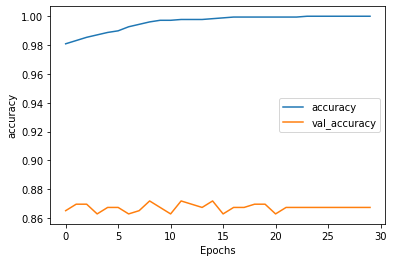

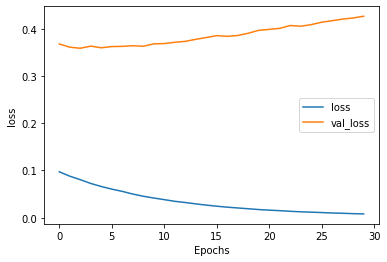

In [92]:
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")